# Analisis del PBI y la esperanza da vida
En el presente informe se analiza como varia el PBI y la esperanza de vida con el tiempo y entre los paises. Ademas, se estudiara la relacion que existe entre el PBI y la esperanza de vida para 6 paises. 

## Carga de modulos
Para el presente trabajo se debe trabajar con diferentes modulos: pandas, seaborn, matplotlib.pyplot y numpy.

In [46]:
#Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Carga de datos
Se trabajo con el banco mundial y la organizacion mundial de la salud como fuente de datos para el PBI y la esperanza de vida respectivamente.

In [47]:
#Load data
gdp_df = pd.read_csv('all_data.csv')
print(gdp_df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Inspeccion de dataframe
Se debe inspeccionar el tipo de datos que presenta cada columna y si alguna de las columnas presenta datos nulos

In [48]:
#Inspect GDP dataframe
gdp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Debido a que el tipo de datos es adecuado para cada variable y a que no existen variables con celdas nulas, se procede sin necesidad de trabajar estos datos.


## Modificacion de los datos y creación de nuevos dataframe
En esta seccion se busca preparar los datos y crear nuevos dataframes que seran utiles mas adelantes para el analisis. Tambien se crean listas con todos los paises y años a analizar. 

In [55]:


#Modify original dataframe (rename colum "Life expectancy at birth(year)")
gdp_df.columns = ['country', 'year', 'life_expectancy', 'gdp']
gdp_df['country'] = gdp_df.country.apply(lambda x: 'USA' if x == 'United States of America' else x)



#Create new dataframes
gdp_df_country_2 = gdp_df[gdp_df.country.isin(['Chile', 'Mexico'])]
gdp_df_country_3 = gdp_df[gdp_df.country=='Zimbabwe']
gdp_df_country_4 = gdp_df[gdp_df.country.isin(['USA', 'China'])]
gdp_df_country_5 = gdp_df[gdp_df.country.isin(['Chile', 'Mexico', 'USA', 'China', 'Germany'])]



#Countries and years
countries = gdp_df.country.unique()
countries_2 = gdp_df_country_2.country.unique() #For countries with less variation of GDP
years = gdp_df.year.unique()
countries_5 = gdp_df_country_5.country.unique() #For countries with less variation of GDP
print(countries)
print(years)


#Summary statics
gdp_df_mean_country = gdp_df.groupby('country').gdp.mean().reset_index()
gdp_df_mean_year = gdp_df.groupby('year').gdp.mean().reset_index()
le_df_mean_country = gdp_df.groupby('country').life_expectancy.mean().reset_index()
le_df_mean_year = gdp_df.groupby('year').life_expectancy.mean().reset_index()


mean_gdp = gdp_df.gdp.mean()
mean_le = gdp_df.life_expectancy.mean()
mean_le2 = gdp_df_country_5.life_expectancy.mean()
mean_le3 = gdp_df_country_3.life_expectancy.mean()
print('The average GDP for the countries in studied is:', f'{mean_gdp:.2E}')
print('The average life expectancy at birth in years for the countries in studied is:', round(mean_le,2))
print('The average life expectancy at birth in years for all the countries except Zimbabwe is:', round(mean_le2,2))
print('The average life expectancy at birth in years for Zimbabwe is:', round(mean_le3,2))




['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
The average GDP for the countries in studied is: 3.88E+12
The average life expectancy at birth in years for the countries in studied is: 72.79
The average life expectancy at birth in years for all the countries except Zimbabwe is: 77.33
The average life expectancy at birth in years for Zimbabwe is: 50.09


## Visualizacion de los datos
A continuacion se obtendran distintos tipos de graficos para analizar los datos obtenidos


### Analisis del PBI
Para analizar el GDP se realizaran los siguientes graficos:
- Histplot del PBI
- Boxplot del PBI vs pais
- Boxplot del PBI vs pais, pero en este caso seleccionando los paises con valores de GDP del mismo orden. 
- Boxplot del PBI vs año
- Lineplot del PBI vs año para cada pais

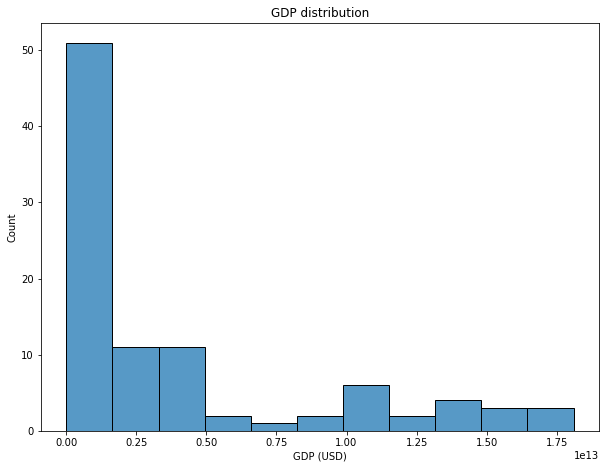

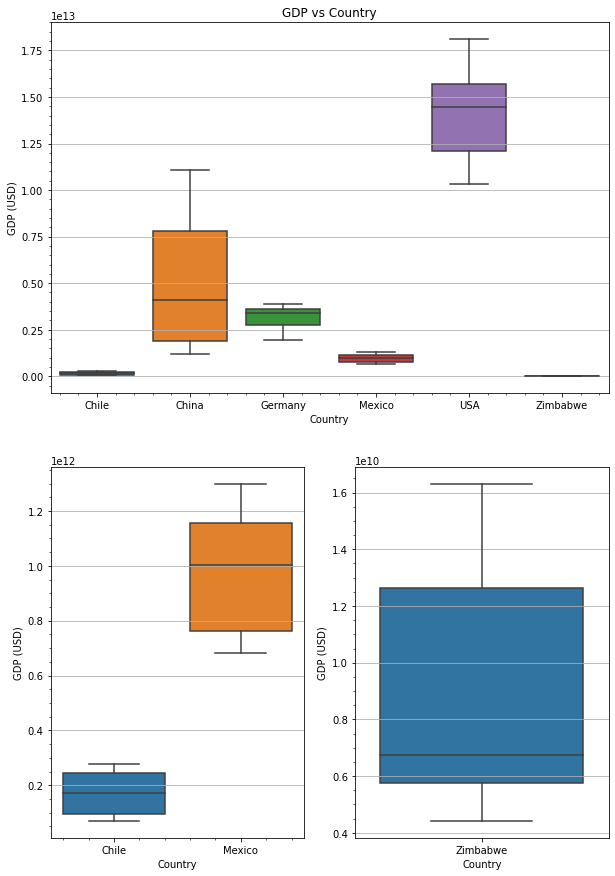

<Figure size 432x288 with 0 Axes>

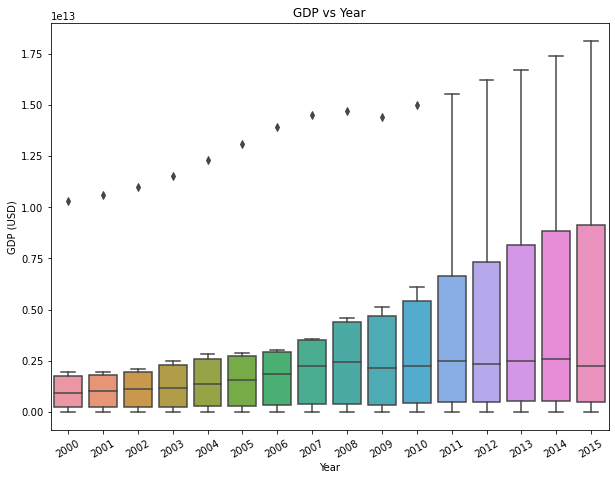

<Figure size 432x288 with 0 Axes>

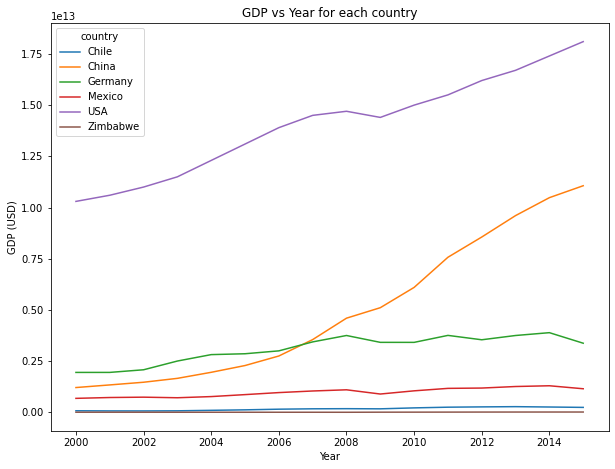

<Figure size 432x288 with 0 Axes>

In [53]:
# Visualizing data(GDP distribution)
plt.figure(figsize=(10,7.5))
plt.title('GDP distribution')
plt.xlabel('GDP (USD)')
sns.histplot(gdp_df.gdp)

## Visualizing data (gdp-country)
plt.figure(figsize=(10,15))
plt.subplot(2,2,(1,2))
ax1=plt.subplot(2,2,(1,2))
ax1.set_xticks(range(len(countries)))
ax1.set_xticklabels(countries)
plt.grid()
plt.minorticks_on()
plt.title('GDP vs Country')
sns.boxplot(x='country', y='gdp', data=gdp_df)
ax1.set(xlabel='Country',ylabel='GDP (USD)')


plt.subplot(2,2,3)
ax1=plt.subplot(2,2,3)
ax1.set_xticks(range(len(countries_2)))
ax1.set_xticklabels(countries_2)
plt.grid()
plt.minorticks_on()
sns.boxplot(x='country', y='gdp', data=gdp_df_country_2)
ax1.set(xlabel='Country',ylabel='GDP (USD)')

plt.subplot(2,2,4)
ax1=plt.subplot(2,2,4)
plt.grid()
plt.minorticks_on()
sns.boxplot(x='country', y='gdp', data=gdp_df_country_3)
ax1.set(xlabel='Country',ylabel='GDP (USD)')

plt.show()
plt.clf()

## Visualizing data (gdp-year)
plt.figure(figsize=(10,7.5))
plt.subplot(1,1,1)
ax1=plt.subplot(1,1,1)
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years,rotation=30)
plt.title('GDP vs Year')
sns.boxplot(x='year', y='gdp', data=gdp_df)
ax1.set(xlabel='Year',ylabel='GDP (USD)')


plt.show()
plt.clf()

## Visualizing data(gdp - year and country)
plt.figure(figsize=(10,7.5))
plt.subplot(1,1,1)
ax1=plt.subplot(1,1,1)

plt.title('GDP vs Year for each country')
sns.lineplot(x='year', y='gdp', hue='country',data=gdp_df)
ax1.set(xlabel='Year',ylabel='GDP (USD)')
                
plt.show()
plt.clf()




### Analisis de la esperanza de vida
Para analizar la esperanza de visa se realizaran los siguientes graficos: 
- Histplot de la esperanza de vida
- Boxplot de la esperanza de vida vs pais 
- Boxplot de la esperanza de vida vs pais, pero en este caso seleccionando los paises con valores de GDP del mismo orden. 
- Boxplot de la esperanza de vida vs año 
- Lineplot de la esperanza de vida vs año para cada pais

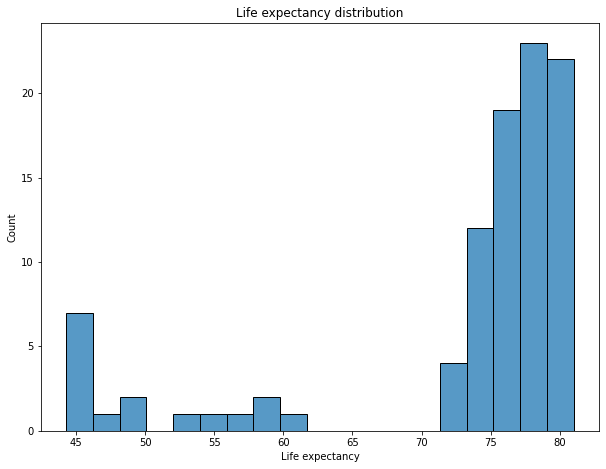

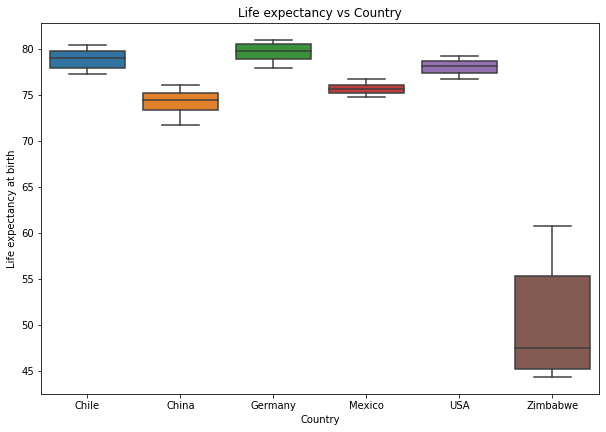

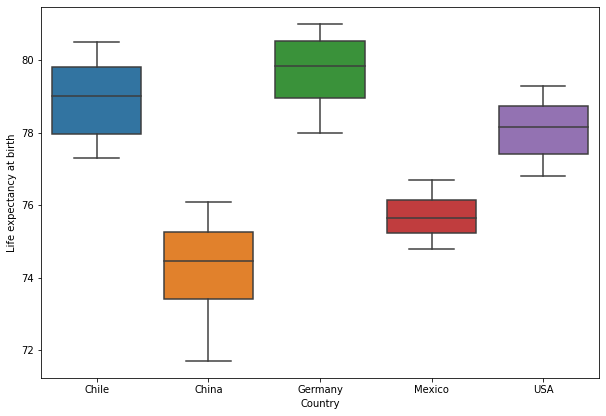

<Figure size 432x288 with 0 Axes>

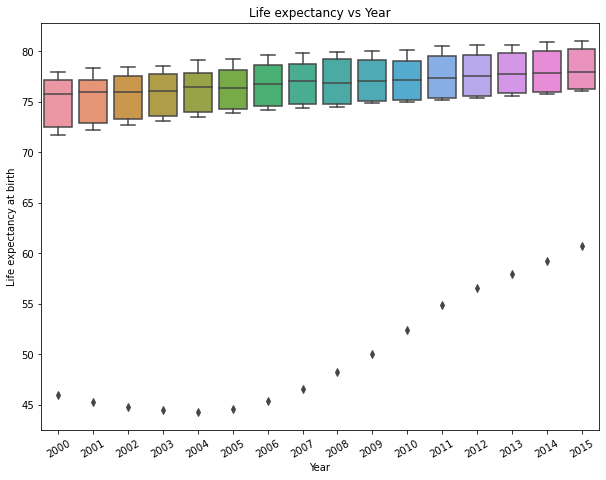

<Figure size 432x288 with 0 Axes>

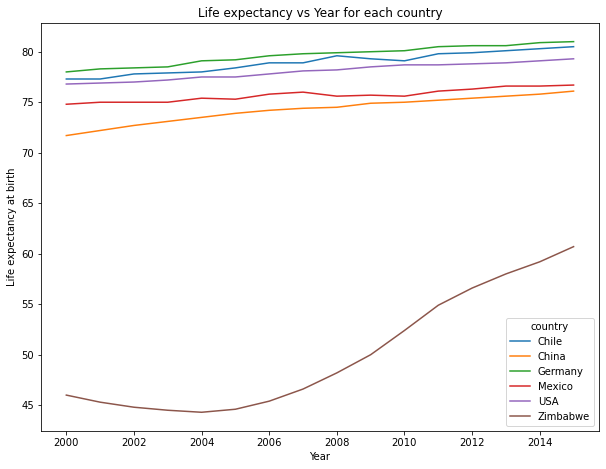

<Figure size 432x288 with 0 Axes>

In [54]:
# Visualizing data(Life expectancy distribution)
plt.figure(figsize=(10,7.5))
plt.title('Life expectancy distribution')
plt.xlabel('Life expectancy')
sns.histplot(gdp_df.life_expectancy)


## Visualizing data (life_expectancy-contry)
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
ax1=plt.subplot(2,1,1)
ax1.set_xticks(range(len(countries)))
ax1.set_xticklabels(countries)
plt.title('Life expectancy vs Country')
sns.boxplot(x='country', y='life_expectancy', data=gdp_df)
ax1.set(xlabel='Country',ylabel='Life expectancy at birth')


plt.figure(figsize=(10,15))
plt.subplot(2,1,2)
ax1=plt.subplot(2,1,2)
ax1.set_xticks(range(len(countries_5)))
ax1.set_xticklabels(countries_5)
sns.boxplot(x='country', y='life_expectancy', data=gdp_df_country_5)
ax1.set(xlabel='Country',ylabel='Life expectancy at birth')


plt.show()
plt.clf()

## Visualizing data (life_expectancy-year)
plt.figure(figsize=(10,7.5))
plt.subplot(1,1,1)
ax1=plt.subplot(1,1,1)
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years, rotation=30)
plt.title('Life expectancy vs Year')
sns.boxplot(x='year', y='life_expectancy', data=gdp_df)
ax1.set(xlabel='Year',ylabel='Life expectancy at birth')

                
plt.show()
plt.clf()

## Visualizing data (life_expectancy - year and country)
plt.figure(figsize=(10,7.5))
plt.subplot(1,1,1)
ax1=plt.subplot(1,1,1)
plt.title('Life expectancy vs Year for each country')
sns.lineplot(x='year', y='life_expectancy', hue='country',data=gdp_df)
ax1.set(xlabel='Year',ylabel='Life expectancy at birth')
                
plt.show()
plt.clf()

Por ultimo, para cada pais se graficara:
- La relacion entre el PBI y la esperanza de vida
- La variacion con el tiempo del PBI
- La variacion con el tiempo de la esperanza de vida

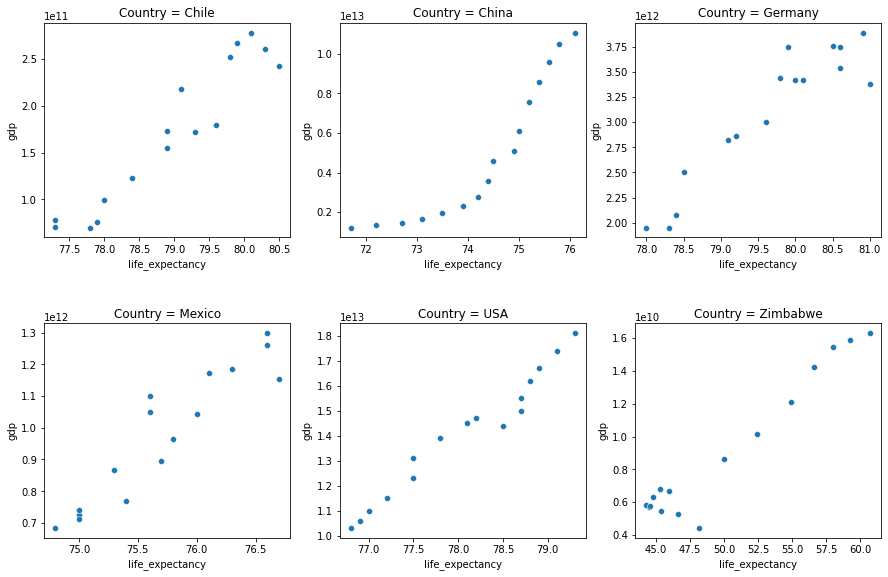

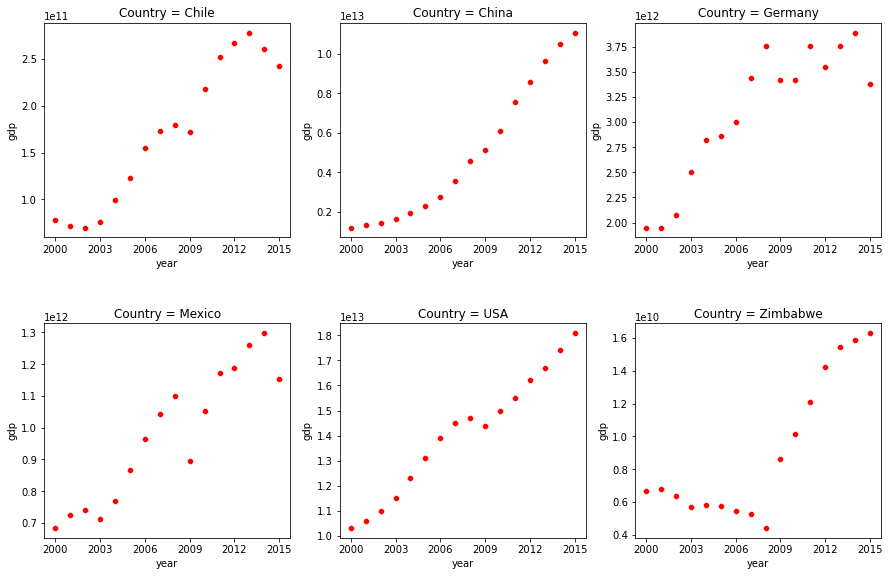

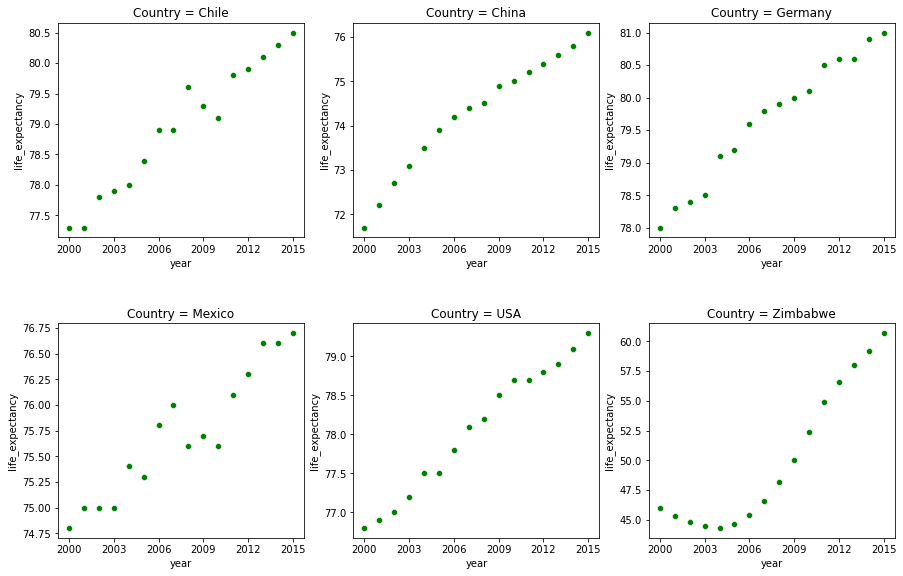

In [52]:
from pandas.plotting import lag_plot
#Visualizing aata (life_expectancy-gdp)
plt.figure(figsize=(15,15))
for i in range(len(countries)):
    gdp_country = gdp_df[gdp_df.country==countries[i]]
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=0.4) 
    ax=plt.subplot(3,3,i+1)
    plt.title('Country = ' + countries[i])
    sns.scatterplot(x=gdp_country.life_expectancy, y=gdp_country.gdp)
    
plt.figure(figsize=(15,15))
for i in range(len(countries)):
    gdp_country = gdp_df[gdp_df.country==countries[i]]
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=0.4) 
    ax=plt.subplot(3,3,i+1)
    ax.set_xticks([2000, 2003, 2006, 2009, 2012, 2015])
    plt.title('Country = ' + countries[i])
    sns.scatterplot(x=gdp_country.year, y=gdp_country.gdp, color='r')

plt.figure(figsize=(15,15))
for i in range(len(countries)):
    gdp_country = gdp_df[gdp_df.country==countries[i]]
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(hspace=0.4) 
    ax=plt.subplot(3,3,i+1)
    ax.set_xticks([2000, 2003, 2006, 2009, 2012, 2015])
    plt.title('Country = ' + countries[i])
    sns.scatterplot(x=gdp_country.year, y=gdp_country.life_expectancy, color='g')




## Conclusiones
- Para todos los paises, excepto Zimbabwe, se observa una correlacion positiva la relacion del PBI y la esperanza de vida con el tiempo. Por otro lado, en el caso de Zimbabwe, se observa una correlacion negativa al inicio, sin embargo a partir del año 2008 (para el PBI) y 2004(para la esperanza de vida), se observa una correlacion positiva. Se debe destacar que con el paso del tiempo se incremento en gran medida la brecha entre los PBI, a pesar de que la media se incremento hasta el año 2008 y luego se mantuvo practicamente constante hasta el 2015. 

- Una gran parte de de los paises en ese periodo de tiempo presentaron un PBI inferior a los 2.5 billones de dolares y una esperanza de vida entre 75-80 años.

- Se observan claras diferencias en el PBI de cada pais, tanto en lo relativo a la variacion con el tiempo como a su valor. Por lo que se puede deducir que existe una fuerte dependencia entre el pais y su PBI. 

- Si bien en el boxplot se observa un importante solapamiento para la esperanza de vida de algunos paises, especialmente para los paises con valores superiores (Alemania, Chile y Estados Unidos), otros, principalmente Zimbabwe, presentan un solapamiento muy pequeño o nulo. Tambien es importante observar que el incremento con el paso del tiempo de Chile, China y Alemania fue bastante similar (3-4 años aprox) al igual que para el caso de Mexico y USA(2 años aprox). El pais que se destaca claramente en el incremento de su esperanza de vida en los años analizados es Zimbabwe, logrando un aumento de aproximadamente 16 años. A pesar de esto, Sigue siendo por lejos el pais con menor esperanza de vida de los 6 analizados. 

- El mayor aumento absoluto de PBI fue logrado por China, seguido por USA. A pesar de esto, Estados Unidos durante todos los años analizados se mantuvo siendo el pais con mayor PBI. Tambien es importante destacar que china empezo presentando un PBI inferior a Alemania, sin embargo con el paso del tiempo logro superarlo en este sentido. 

- Existe una correlacion positiva entre el PBI y la esperanza de vida para los paises analizados. 

- El PBI promedio para los paises analizados es de: 3.88 billones de dolares.

- La esperanza de vida promedio es de 73 años. Sin embargo, para todos los paises excepto Zimbabwe la esperanza de vida es de 77 años, mientras que para Zimbabwe es de 50 años.
